# Unsupervised Learning: K-means clustering & PCA

**Unsupervised learning** is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision.

Unsupervised learning cannot be directly applied to a regression or classification problem because unlike supervised learning, we have the input data but no corresponding output data. The goal of unsupervised learning is **to find the underlying structure of dataset, group that data according to similarities, and represent that dataset in a compressed format.**

In [7]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
from matplotlib import pyplot as plt
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

IPython: 8.12.0
numpy: 1.24.3
scipy: 1.10.1
matplotlib: 3.7.1
scikit-learn: 1.2.2


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
model = make_pipeline(StandardScaler(), LinearRegression())
x = np.arange(10)
y = 2 * x + 1
X = x[:, np.newaxis]

## K-means Example:

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

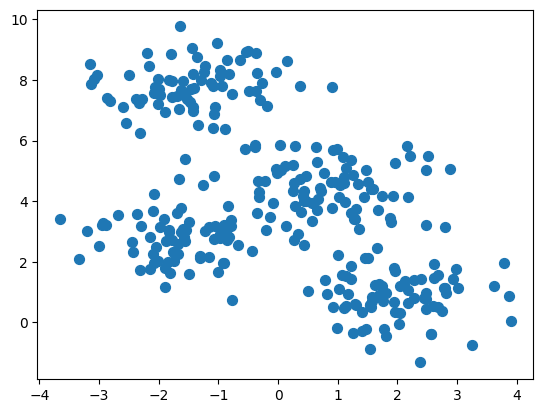

In [9]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], s=50);

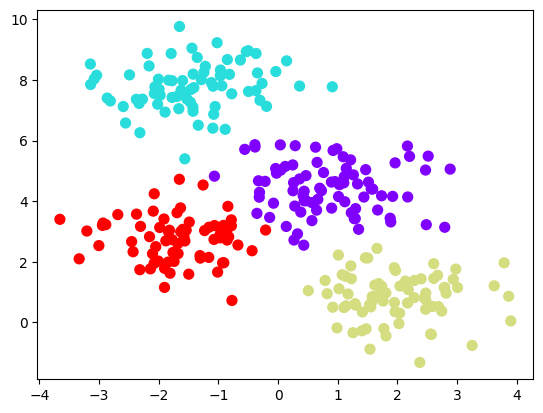

In [10]:
from sklearn.cluster import KMeans
est = KMeans(4, n_init=10)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

##  Principal Component Analysis (PCA) 

We will explore Principal Component Analysis (PCA) using the scikit-learn library. PCA is a dimensionality reduction technique that can be used for visualization, noise reduction, or improving the performance of machine learning algorithms.
Let's get started!

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Load the Iris dataset

First, we'll load the Iris dataset and create a DataFrame with the feature names.

In [12]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Standardize the dataset

Before applying PCA, it's important to standardize the dataset to have mean=0 and variance=1 for each feature. We'll use the `StandardScaler` from scikit-learn for this purpose.

In [13]:
# Standardize the dataset
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(iris_df)

#### Apply PCA

Now, we'll apply PCA to the standardized dataset. We'll reduce the dimensionality to 2 principal components for easier visualization.

In [14]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_iris)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['target'] = iris.target
principal_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


#### Visualize the PCA results

Finally, let's visualize the PCA results by plotting the two principal components and color-coding the points based on the Iris species.

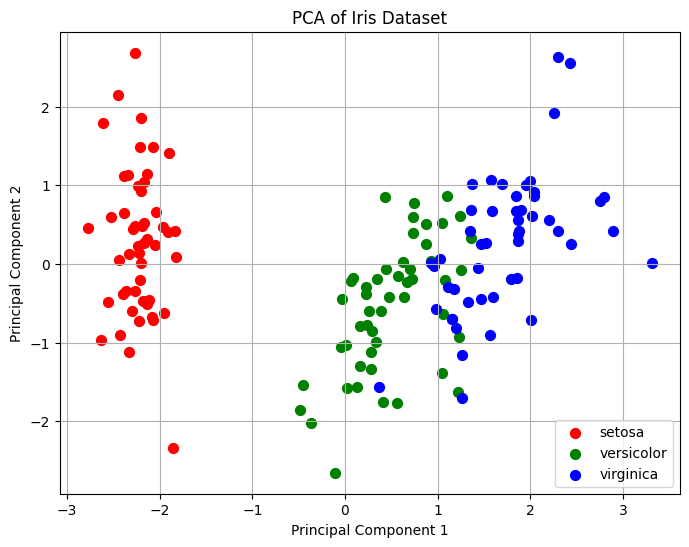

In [15]:
# Visualize the PCA results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
targets = [0, 1, 2]
for target, color in zip(targets, colors):
    indices_to_keep = principal_df['target'] == target
    plt.scatter(principal_df.loc[indices_to_keep, 'PC1'],
                principal_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(iris.target_names)
plt.grid()
plt.show()